# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from iso3166 import countries as isocountries
from iso3166 import countries_by_alpha3
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
# DF shape, rows, columns
print("Rows, Columns")
df_data.shape

Rows, Columns


(4324, 9)

In [ ]:
# Column names
print("Column names")
df_data.columns

Column names


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
# Column types
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
# NaN Check
print(f"Is there any NaN Values?: {df_data.isna().values.any()}")
print(f"Total number of Values: {df_data.isna().values.sum()}")
print(f"NaN Values in the Price column: {df_data['Price'].isna().values.sum()}")
# Dup Check
print(f"Is there any duplicates Values?: {df_data.duplicated().values.any()}")

Is there any NaN Values?: True
Total number of Values: 3360
NaN Values in the Price column: 3360
Is there any duplicates Values?: False


In [ ]:
df_data.isna()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


In [ ]:
df_data.loc[4319]

Unnamed: 0.1                                          4319
Unnamed: 0                                            4319
Organisation                                       US Navy
Location          LC-18A, Cape Canaveral AFS, Florida, USA
Date                            Wed Feb 05, 1958 07:33 UTC
Detail                           Vanguard | Vanguard TV3BU
Rocket_Status                                StatusRetired
Price                                                  NaN
Mission_Status                                     Failure
Name: 4319, dtype: object

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
# Replace na values with 0
df_data.fillna(0, inplace=True)

In [ ]:
# Removed the specified columns
clean_df = df_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [ ]:
# Change Price column to float
clean_df.Price = clean_df.Price.astype(str).str.replace(",", "")
clean_df.Price = pd.to_numeric(clean_df.Price)

In [ ]:
# Change Date column to datetime
clean_df.Date = pd.to_datetime(clean_df.Date, format="mixed")
clean_df.Date = clean_df.Date.astype(str).str[0:19]
clean_df.Date = pd.to_datetime(clean_df.Date)

In [ ]:
# Insert a date only column
date_only = clean_df.Date.astype(str).str[0:10]
date_only = pd.to_datetime(date_only)
date_only.head()
clean_df.insert(loc=3, column="Date_Only", value=date_only)

In [ ]:
# Insert a year only column
year_only = clean_df.Date.astype(str).str[0:4]
year_only = pd.to_numeric(year_only)
year_only.head()
clean_df.insert(loc=4, column="Year_Only", value=year_only)

## Descriptive Statistics

In [ ]:
clean_df.head()

,Organisation,Location,Date,Date_Only,Year_Only,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,2020-08-07,2020,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,2020-08-06,2020,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,2020-08-04,2020,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,2020-07-30,2020,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,2020-07-30,2020,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [ ]:
clean_df.tail()

,Organisation,Location,Date,Date_Only,Year_Only,Detail,Rocket_Status,Price,Mission_Status
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,1958-02-05,1958,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,1958-02-01,1958,Juno I | Explorer 1,StatusRetired,0.00,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,1957-12-06,1957,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,1957-11-03,1957,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00,1957-10-04,1957,Sputnik 8K71PS | Sputnik-1,StatusRetired,0.00,Success


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4324 non-null   object        
 1   Location        4324 non-null   object        
 2   Date            4324 non-null   datetime64[ns]
 3   Date_Only       4324 non-null   datetime64[ns]
 4   Year_Only       4324 non-null   int64         
 5   Detail          4324 non-null   object        
 6   Rocket_Status   4324 non-null   object        
 7   Price           4324 non-null   float64       
 8   Mission_Status  4324 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 304.2+ KB


In [ ]:
clean_df.describe()

,Date,Date_Only,Year_Only,Price
count,4324,4324,"4,324.00","4,324.00"
mean,1987-11-28 17:10:45.735430208,1987-11-28 05:24:01.998149824,"1,987.39",34.29
min,1957-10-04 19:28:00,1957-10-04 00:00:00,"1,957.00",0.00
25%,1972-04-20 07:28:30,1972-04-19 18:00:00,"1,972.00",0.00
50%,1984-12-17 00:17:30,1984-12-16 12:00:00,"1,984.00",0.00
75%,2002-09-10 20:50:45,2002-09-10 12:00:00,"2,002.00",0.00
max,2020-08-07 05:12:00,2020-08-07 00:00:00,"2,020.00","5,000.00"
std,NaN,NaN,18.07,150.44


In [ ]:
# Total Number of Missions
print(f"The total number of missions from csv is: {clean_df.Date.count()}")

The total number of missions from csv is: 4324


In [ ]:
# Earliest Mission
#clean_df.Date.idxmin()
print(f"Earliest mission's statistics:\n\n {clean_df.loc[4323]}")

Earliest mission's statistics:

 Organisation                                      RVSN USSR
Location          Site 1/5, Baikonur Cosmodrome, Kazakhstan
Date                                    1957-10-04 19:28:00
Date_Only                               1957-10-04 00:00:00
Year_Only                                              1957
Detail                           Sputnik 8K71PS | Sputnik-1
Rocket_Status                                 StatusRetired
Price                                                  0.00
Mission_Status                                      Success
Name: 4323, dtype: object


In [ ]:
# Most Current Mission
#clean_df.Date.idxmax()
print(f"Most current mission's statistics from file:\n\n {clean_df.loc[0]}")

Most current mission's statistics from file:

 Organisation                                            SpaceX
Location            LC-39A, Kennedy Space Center, Florida, USA
Date                                       2020-08-07 05:12:00
Date_Only                                  2020-08-07 00:00:00
Year_Only                                                 2020
Detail            Falcon 9 Block 5 | Starlink V1 L9 & BlackSky
Rocket_Status                                     StatusActive
Price                                                    50.00
Mission_Status                                         Success
Name: 0, dtype: object


In [ ]:
# Most Expensive Mission
#clean_df.Price.idxmax()
print(f"Most expensive mission's statistics from file:\n\n {clean_df.loc[1916]}")

Most expensive mission's statistics from file:

 Organisation                                         RVSN USSR
Location          Site 110/37, Baikonur Cosmodrome, Kazakhstan
Date                                       1988-11-15 03:00:00
Date_Only                                  1988-11-15 00:00:00
Year_Only                                                 1988
Detail                                  Energiya/Buran | Buran
Rocket_Status                                    StatusRetired
Price                                                 5,000.00
Mission_Status                                         Success
Name: 1916, dtype: object


In [ ]:
# Mission Status
#mission_status = clean_df.groupby("Mission_Status").count()
mission_status = clean_df.Mission_Status.value_counts()
print("Mission status statistics:\n")
print(mission_status)

Mission status statistics:

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64


In [ ]:
# Rockets Launched per year
rockets_per_year = clean_df.Year_Only.value_counts()
print("The most rockets launched per year:\n")
print(rockets_per_year.head())
print("\n\nThe least rockets launched per year:\n")
print(rockets_per_year.tail())

The most rockets launched per year:

Year_Only
1971    119
2018    117
1977    114
1975    113
1976    113
Name: count, dtype: int64


The least rockets launched per year:

Year_Only
2010    37
2005    37
1958    28
1959    20
1957     3
Name: count, dtype: int64


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
org_launches = clean_df.Organisation.value_counts().sort_values(ascending=True)
org_launches

Organisation
Khrunichev             1
Landspace              1
Douglas                1
EER                    1
Starsem                1
Sandia                 1
IRGC                   1
i-Space                1
OneSpace               1
Virgin Orbit           1
Yuzhmash               2
OKB-586                2
RAE                    2
KARI                   3
SRC                    3
AEB                    3
Arm??e de l'Air        4
Exos                   4
CECLES                 4
CASIC                  5
KCST                   5
UT                     5
Land Launch            7
JAXA                   7
MITT                   7
AMBA                   8
CNES                   8
ASI                    9
ExPace                10
IAI                   11
Blue Origin           12
ESA                   13
Eurockot              13
Rocket Lab            13
ISA                   13
US Navy               17
Kosmotras             22
ISAS                  30
Sea Launch            36
ILS         

In [ ]:
# Horizontal Chart
org_launch_bar = px.bar(x=org_launches.values,
                        y=org_launches.index,
                        orientation="h",
                        title="Number of Launches Per Organization")

org_launch_bar.update_layout(xaxis_title="Number of Launches",
                             yaxis_title="Organization")

org_launch_bar.show()

In [ ]:
# Vertical Chart
org_launch_bar = px.bar(y=org_launches.values,
                        x=org_launches.index,
                        title="Number of Launches Per Organization")

org_launch_bar.update_layout(yaxis_title="Number of Launches",
                             xaxis_title="Organization")

org_launch_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
rocket_status = clean_df.Rocket_Status.value_counts()
rocket_status

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

In [ ]:
rocket_status_bar = px.bar(x=rocket_status.index,
                    y=rocket_status.values,
                    text_auto=".2s",
                    title="Rocket Status")

rocket_status_bar.update_layout(xaxis_title="Status",
                                yaxis_title="Number of Rockets")

rocket_status_bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [ ]:
mission_status_bar = px.bar(x=mission_status.index,
                            y=mission_status.values,
                            title="Mission Status",
                            text_auto=".1s",
                            color=mission_status,
                            color_continuous_scale="magma")

mission_status_bar.update_layout(xaxis_title="Mission Status",
                                 yaxis_title="Number of Missions")

mission_status_bar.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
# Sorts Missions by expense excluding those where the value is 0
mission_expense = clean_df.query("Price != 0")
mission_expense.sort_values("Price", ascending=False)
mission_expense

,Organisation,Location,Date,Date_Only,Year_Only,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,2020-08-07,2020,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,2020-08-06,2020,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,2020-07-30,2020,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,2020-07-30,2020,Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00,2020-07-25,2020,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29 18:43:00,1966-07-29,1966,Titan IIIB | KH-8,StatusRetired,59.00,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06 15:00:00,1965-05-06,1965,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11 15:19:00,1965-02-11,1965,Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10 16:52:00,1964-12-10,1964,Titan IIIA | Transtage 2,StatusRetired,63.23,Success


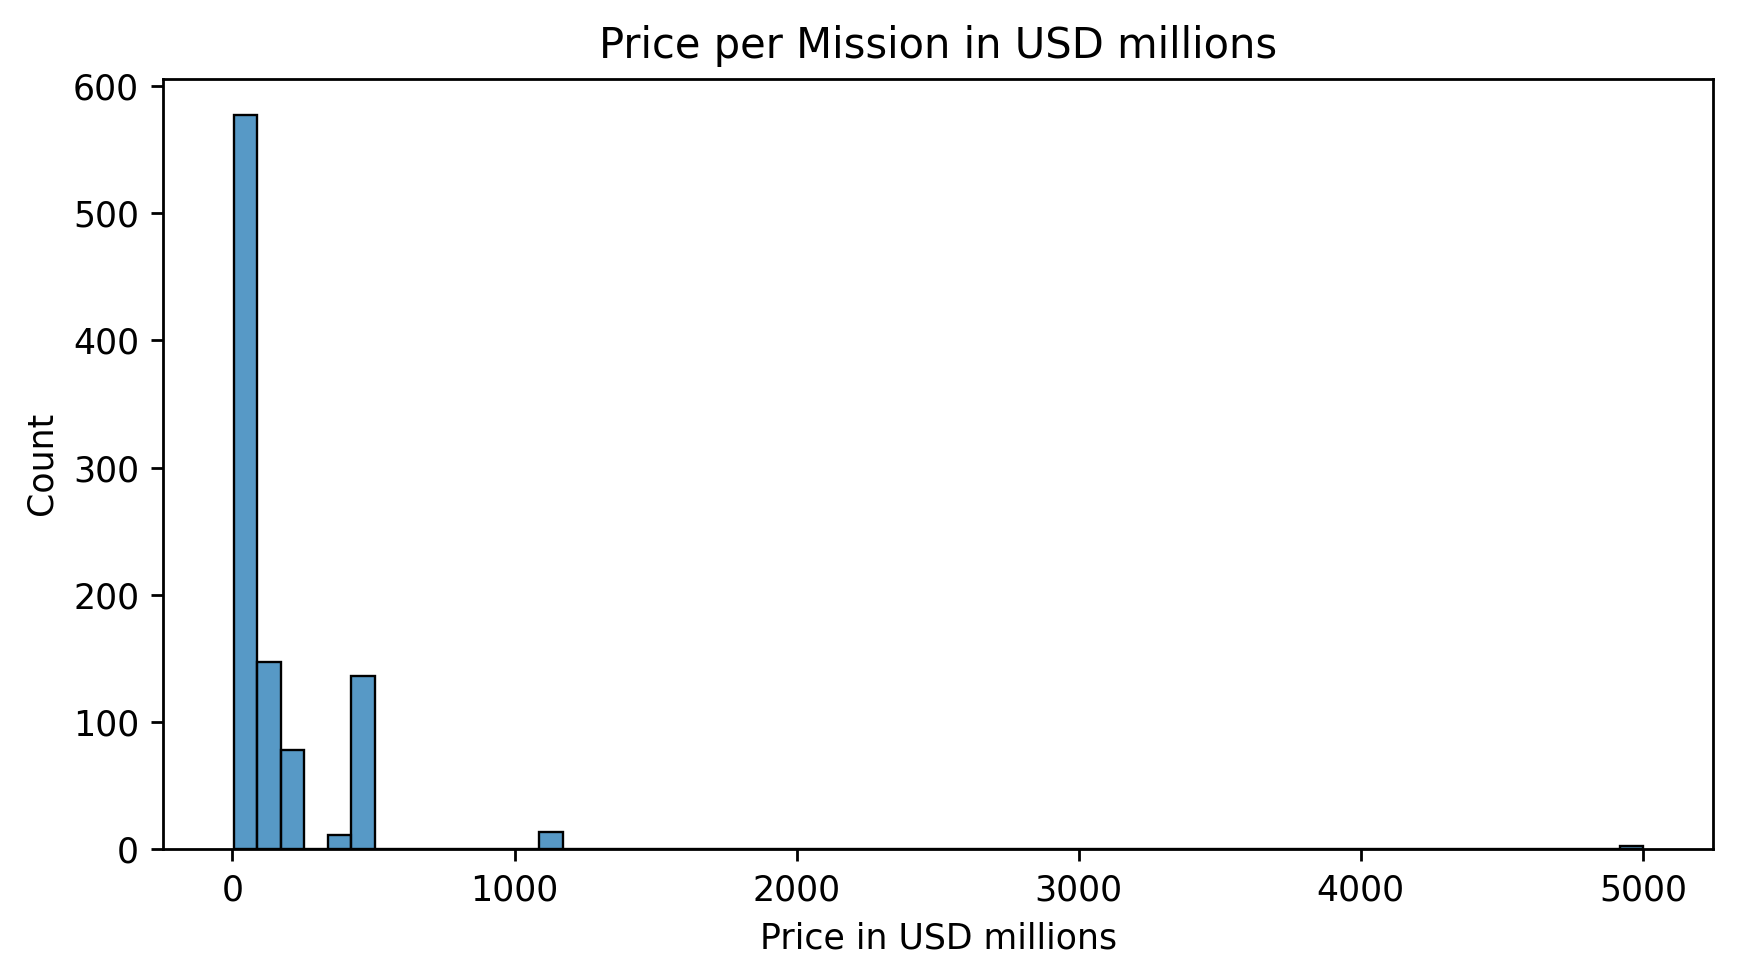

In [ ]:
plt.figure(figsize=(8, 4), dpi=250)
sns.histplot(data=mission_expense,
             x=mission_expense.Price,
             bins=60)

plt.xlabel("Price in USD millions")
plt.title("Price per Mission in USD millions")
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
clean_df.Location

0              LC-39A, Kennedy Space Center, Florida, USA
1       Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                           Pad A, Boca Chica, Texas, USA
3            Site 200/39, Baikonur Cosmodrome, Kazakhstan
4                SLC-41, Cape Canaveral AFS, Florida, USA
                              ...                        
4319             LC-18A, Cape Canaveral AFS, Florida, USA
4320             LC-26A, Cape Canaveral AFS, Florida, USA
4321             LC-18A, Cape Canaveral AFS, Florida, USA
4322            Site 1/5, Baikonur Cosmodrome, Kazakhstan
4323            Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Location, Length: 4324, dtype: object

## Add Country Column

In [ ]:
# Country gets the last part of the location entry which is the country of the location.
locations = clean_df['Location'].astype(str).str.split(",")
locations = locations.to_list()
country_list = []
for item in range(len(locations)):
  locations[item][-1] = locations[item][-1].lstrip(" ")
  country_list.append(locations[item][-1])
countries = pd.DataFrame(country_list)
clean_df.insert(loc=2, column="Country", value=countries)
clean_df[['Location', 'Country']]

,Location,Country
0,"LC-39A, Kennedy Space Center, Florida, USA",USA
1,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China
2,"Pad A, Boca Chica, Texas, USA",USA
3,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan
4,"SLC-41, Cape Canaveral AFS, Florida, USA",USA
...,...,...
4319,"LC-18A, Cape Canaveral AFS, Florida, USA",USA
4320,"LC-26A, Cape Canaveral AFS, Florida, USA",USA
4321,"LC-18A, Cape Canaveral AFS, Florida, USA",USA
4322,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan


## Clean up Country Column

In [ ]:
# Russia -> Russian Federation
clean_df.Country.replace("Russia", "Russian Federation", inplace=True)
# New Mexico -> USA
clean_df.Country.replace("New Mexico", "USA", inplace=True)
# Yellow Sea -> China
clean_df.Country.replace("Yellow Sea", "China", inplace=True)
# Shahrud Missile Test Site -> Iran
clean_df.Country.replace("Shahrud Missile Test Site", "Iran, Islamic Republic of", inplace=True)
# Pacific Missile Range Facility -> USA
clean_df.Country.replace("Pacific Missile Range Facility", "USA", inplace=True)
# Barents Sea -> Russian Federation
clean_df.Country.replace("Barents Sea", "Russian Federation", inplace=True)
# Gran Canaria -> USA
clean_df.Country.replace("Gran Canaria", "USA", inplace=True)
# Iran -> Iran, Islamic Republic of
clean_df.Country.replace("Iran", "Iran, Islamic Republic of", inplace=True)
# North Korea -> Korea, Democratic People's Republic of
clean_df.Country.replace("North Korea", "Korea, Democratic People's Republic of", inplace=True)
# South Korea -> Korea, Republic of
clean_df.Country.replace("South Korea", "Korea, Republic of", inplace=True)
# Remove Pacific Ocean ~ Sea Launch (Multi-national Company)
clean_df = clean_df[clean_df.Country != "Pacific Ocean"]

## Add ISO Column

In [ ]:
# Add ISO Column
iso3_list = clean_df.Country.to_list()
for item in range(len(iso3_list)):
  iso3_list[item] = isocountries.get(iso3_list[item]).alpha3
iso3_values = pd.DataFrame(iso3_list)
clean_df.insert(loc=3, column="ISO", value=iso3_values)

In [ ]:
clean_df.head()

,Organisation,Location,Country,ISO,Date,Date_Only,Year_Only,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,USA,2020-08-07 05:12:00,2020-08-07,2020,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,CHN,2020-08-06 04:01:00,2020-08-06,2020,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,USA,2020-08-04 23:57:00,2020-08-04,2020,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,KAZ,2020-07-30 21:25:00,2020-07-30,2020,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,USA,2020-07-30 11:50:00,2020-07-30,2020,Atlas V 541 | Perseverance,StatusActive,145.00,Success


## Create Choropleth Map showing number of launches per country

In [ ]:
# Create a DataFrame for Choropleth
df_countries = clean_df.groupby(["ISO"], as_index=False).agg(pd.Series.count)
country_totals = df_countries.Mission_Status
country_name_list = df_countries.ISO.to_list()

for country in range(len(country_name_list)):
  country_name_list[country] = countries_by_alpha3.get(country_name_list[country]).name

df_countries.insert(loc=11, column="Missions", value=country_totals)
df_countries.insert(loc=1, column="Country_Name", value=country_name_list)
df_countries.head()

,ISO,Country_Name,Organisation,Location,Country,Date,Date_Only,Year_Only,Detail,Rocket_Status,Price,Mission_Status,Missions
0,AUS,Australia,6,6,6,6,6,6,6,6,6,6,6
1,BRA,Brazil,3,3,3,3,3,3,3,3,3,3,3
2,CHN,China,264,264,264,264,264,264,264,264,264,264,264
3,FRA,France,297,297,297,297,297,297,297,297,297,297,297
4,IND,India,76,76,76,76,76,76,76,76,76,76,76


In [ ]:
launches_map = px.choropleth(df_countries,
                             title="Number of Launches Per Country",
                             locations="ISO",
                             color="Missions",
                             hover_name="Country_Name",
                             color_continuous_scale=px.colors.sequential.matter
                             )

launches_map.update_layout(coloraxis_showscale=True)

launches_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
# Creates a DataFrame that composes only of missions with a status of Failure
country_failures = clean_df[clean_df.Mission_Status == "Failure"]

df_countries_failure = country_failures.groupby(["ISO"], as_index=False).agg(pd.Series.count)
country_totals_failure = df_countries_failure.Mission_Status
country_name_list_failure = df_countries_failure.ISO.to_list()

for country in range(len(country_name_list_failure)):
  country_name_list_failure[country] = countries_by_alpha3.get(country_name_list_failure[country]).name

df_countries_failure.insert(loc=11, column="Missions", value=country_totals_failure)
df_countries_failure.insert(loc=1, column="Country_Name", value=country_name_list_failure)
df_countries_failure.head()

,ISO,Country_Name,Organisation,Location,Country,Date,Date_Only,Year_Only,Detail,Rocket_Status,Price,Mission_Status,Missions
0,CHN,China,13,13,13,13,13,13,13,13,13,13,13
1,FRA,France,13,13,13,13,13,13,13,13,13,13,13
2,IND,India,4,4,4,4,4,4,4,4,4,4,4
3,IRN,"Iran, Islamic Republic of",6,6,6,6,6,6,6,6,6,6,6
4,JPN,Japan,4,4,4,4,4,4,4,4,4,4,4


In [ ]:
launches_map = px.choropleth(df_countries_failure,
                             title="Number of Launches Per Country with Status of Failure",
                             locations="ISO",
                             color="Missions",
                             hover_name="Country_Name",
                             color_continuous_scale=px.colors.sequential.matter
                             )

launches_map.update_layout(coloraxis_showscale=True)

launches_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
country_org_status = clean_df.groupby(by=["Country",
                                          "Organisation",
                                          "Mission_Status"],
                                      as_index=False).agg(pd.Series.count)

country_org_status = country_org_status.sort_values("Rocket_Status", ascending=False)

country_org_status.head()

,Country,Organisation,Mission_Status,Location,ISO,Date,Date_Only,Year_Only,Detail,Rocket_Status,Price
81,Russian Federation,RVSN USSR,Success,1119,1119,1119,1119,1119,1119,1119,1119
58,Kazakhstan,RVSN USSR,Success,495,492,495,495,495,495,495,495
19,France,Arianespace,Success,267,267,267,267,267,267,267,267
9,China,CASC,Success,231,231,231,231,231,231,231,231
103,USA,General Dynamics,Success,203,203,203,203,203,203,203,203


In [ ]:
country_org_status_burst = px.sunburst(country_org_status,
                                       path=["Country", "Organisation", "Mission_Status"],
                                       values="Rocket_Status",
                                       title="Missions per Country, Organisation & Mission Status")

country_org_status_burst.update_layout(xaxis_title="Number of Missions",
                                       yaxis_title="Country",
                                       coloraxis_showscale=False)
country_org_status_burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
total_money_spent = mission_expense.groupby("Organisation").sum("Price").sort_values("Price", ascending=False)

In [ ]:
print("Total money spent by organization in USD millions. List excludes orgs where value was 0. \n")
print(total_money_spent["Price"])

Total money spent by organization in USD millions. List excludes orgs where value was 0. 

Organisation
NASA              76,280.00
Arianespace       16,345.00
ULA               14,798.00
RVSN USSR         10,000.00
CASC               6,340.26
SpaceX             5,444.00
Northrop           3,930.00
MHI                3,532.50
ISRO               2,177.00
US Air Force       1,550.92
VKS RF             1,548.90
ILS                1,320.00
Boeing             1,241.00
Roscosmos          1,187.50
Martin Marietta      721.40
Kosmotras            638.00
Eurockot             543.40
Lockheed             280.00
JAXA                 168.00
Rocket Lab            97.50
ESA                   37.00
ExPace                28.30
EER                   20.00
Sandia                15.00
Virgin Orbit          12.00
Name: Price, dtype: float64


# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
# Launches per organization including launches where price is listed as 0
org_spend = clean_df[["Organisation", "Date", "Price"]].sort_values(by="Organisation", ascending=True)

In [ ]:
print("Price per launch by organization sorted by Organisation name\n")
print(org_spend[["Organisation","Date", "Price"]].head(10))
print(org_spend[["Organisation","Date", "Price"]].tail(10))

Price per launch by organization sorted by Organisation name

     Organisation                Date  Price
1032          AEB 2003-08-25 00:00:00   0.00
1221          AEB 1999-12-11 19:40:00   0.00
1354          AEB 1997-11-02 00:00:00   0.00
4305         AMBA 1958-08-24 06:17:00   0.00
4294         AMBA 1958-12-06 05:44:00   0.00
4320         AMBA 1958-02-01 03:48:00   0.00
4318         AMBA 1958-03-05 18:27:00   0.00
4316         AMBA 1958-03-26 17:38:00   0.00
4297         AMBA 1958-10-23 03:21:00   0.00
3711         AMBA 1967-11-29 00:00:00   0.00
      Organisation                Date  Price
1522        VKS RF 1995-03-02 13:00:00   0.00
1520        VKS RF 1995-03-22 04:09:00   0.00
1508        VKS RF 1995-05-24 20:10:00   0.00
1506        VKS RF 1995-06-08 04:43:00   0.00
1502        VKS RF 1995-07-05 03:09:00   0.00
1495        VKS RF 1995-08-09 01:21:00   0.00
27    Virgin Orbit 2020-05-25 19:50:00  12.00
1719      Yuzhmash 1991-12-18 03:54:00   0.00
3514      Yuzhmash 1969-11-01

In [ ]:
# Launches per organization where price is greater than zero
greater_than_zero = clean_df.query("Price != 0")
org_spend_greater = greater_than_zero[["Organisation", "Date", "Price"]].sort_values(by="Organisation", ascending=True)

print("Price per launch by organization sorted by Organisation name where the price is NOT listed as 0\n")
print(org_spend_greater[["Organisation","Date", "Price"]].head(10))
print(org_spend_greater[["Organisation","Date", "Price"]].tail(10))

Price per launch by organization sorted by Organisation name where the price is NOT listed as 0

    Organisation                Date  Price
660  Arianespace 2011-12-17 02:03:00  80.00
765  Arianespace 2009-07-01 19:52:00 200.00
758  Arianespace 2009-08-21 22:09:00 200.00
751  Arianespace 2009-10-01 21:59:00 200.00
747  Arianespace 2009-10-29 20:00:00 200.00
725  Arianespace 2010-05-21 22:01:00 200.00
256  Arianespace 2018-04-05 21:34:00 200.00
717  Arianespace 2010-06-26 21:41:00 200.00
770  Arianespace 2009-05-14 13:12:00 200.00
715  Arianespace 2010-08-04 20:45:00 200.00
     Organisation                Date  Price
187        VKS RF 2018-11-30 02:27:00  41.80
252        VKS RF 2018-04-18 22:12:00  65.00
300        VKS RF 2017-12-02 10:43:00  35.00
320        VKS RF 2017-09-28 18:52:00  65.00
330        VKS RF 2017-08-16 22:07:00  65.00
979        VKS RF 2004-11-08 18:29:00  48.50
435        VKS RF 2016-06-04 14:00:00  41.80
198        VKS RF 2018-11-03 20:17:00  48.50
948        VKS

# Chart the Number of Launches per Year

In [ ]:
launches_per_year = clean_df.Year_Only.value_counts()

In [ ]:
launches_per_year.head()

Year_Only
1971    119
2018    117
1977    114
1975    113
1976    113
Name: count, dtype: int64

In [ ]:
launches_per_year_bar = px.bar(x = launches_per_year.index,
                               y = launches_per_year.values,
                               title="Number of Launches per Year",
                               hover_name=launches_per_year.index,
                               color=launches_per_year.values,
                               color_continuous_scale='icefire'
                               )

launches_per_year_bar.update_layout(xaxis_title="Year",
                                    yaxis_title="Launches")

launches_per_year_bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
launches_per_month = clean_df.groupby("Date_Only").count()
launches_per_month

,Organisation,Location,Country,ISO,Date,Year_Only,Detail,Rocket_Status,Price,Mission_Status
Date_Only,,,,,,,,,,
1957-10-04,1,1,1,0,1,1,1,1,1,1
1957-11-03,1,1,1,0,1,1,1,1,1,1
1957-12-06,1,1,1,0,1,1,1,1,1,1
1958-02-01,1,1,1,0,1,1,1,1,1,1
1958-02-05,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2020-07-25,1,1,1,1,1,1,1,1,1,1
2020-07-30,2,2,2,2,2,2,2,2,2,2
2020-08-04,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Bar chart - Zoom in/highlight area to view more visable data
launches_per_month_bar = px.bar(x = launches_per_month.index,
                               y = launches_per_month.Date,
                               title="Number of Launches per Year",
                               hover_name=launches_per_month.index,
                               color=launches_per_month.Date,
                               color_continuous_scale='blackbody'
                               )

launches_per_month_bar.update_layout(xaxis_title="Month",
                                    yaxis_title="Launches",
                                    coloraxis_showscale=False)

launches_per_month_bar.show()

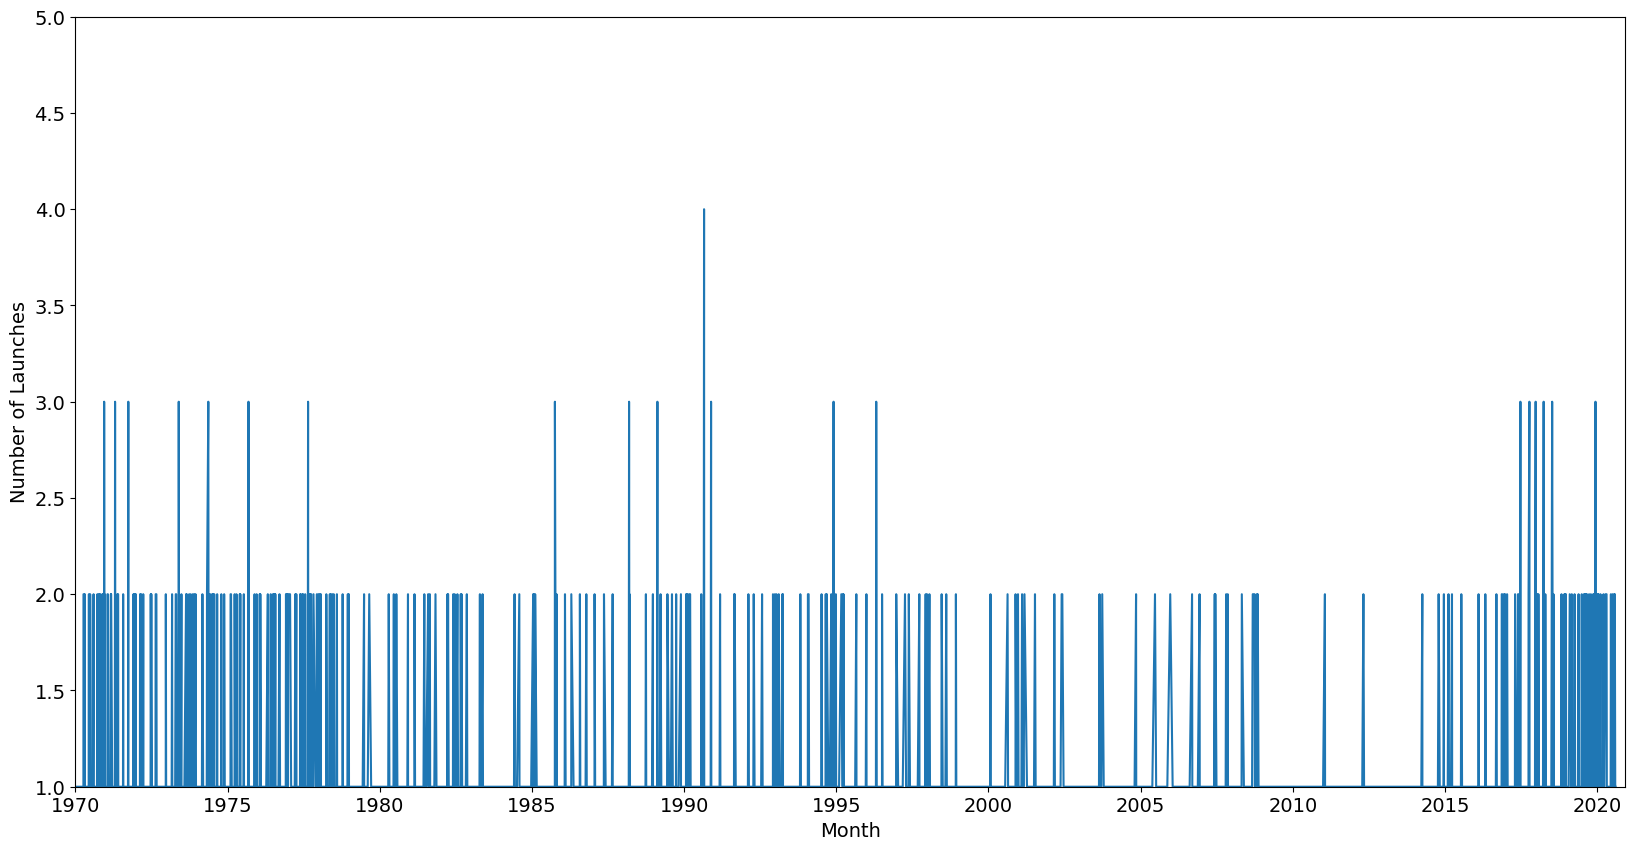

In [ ]:
# Other view...??? - Revisit
plt.figure(figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.ylim(1, 5)
plt.xlim(0, 18600)
plt.plot(launches_per_month.index, launches_per_month['Date'])

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
clean_df.head()

,Organisation,Location,Country,ISO,Date,Date_Only,Year_Only,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,USA,2020-08-07 05:12:00,2020-08-07,2020,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,CHN,2020-08-06 04:01:00,2020-08-06,2020,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,USA,2020-08-04 23:57:00,2020-08-04,2020,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,KAZ,2020-07-30 21:25:00,2020-07-30,2020,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,USA,2020-07-30 11:50:00,2020-07-30,2020,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [ ]:
months = clean_df.Date_Only.dt.month
months.value_counts()

Date_Only
12    449
6     396
4     380
10    377
8     370
9     363
7     349
3     348
11    335
2     334
5     322
1     265
Name: count, dtype: int64

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
price_over_time = greater_than_zero[["Date", "Price"]].sort_values(by="Date", ascending=True)
price_over_time.head()

,Date,Price
4020,1964-09-01 15:00:00,63.23
4000,1964-12-10 16:52:00,63.23
3993,1965-02-11 15:19:00,63.23
3971,1965-05-06 15:00:00,63.23
3855,1966-07-29 18:43:00,59.00


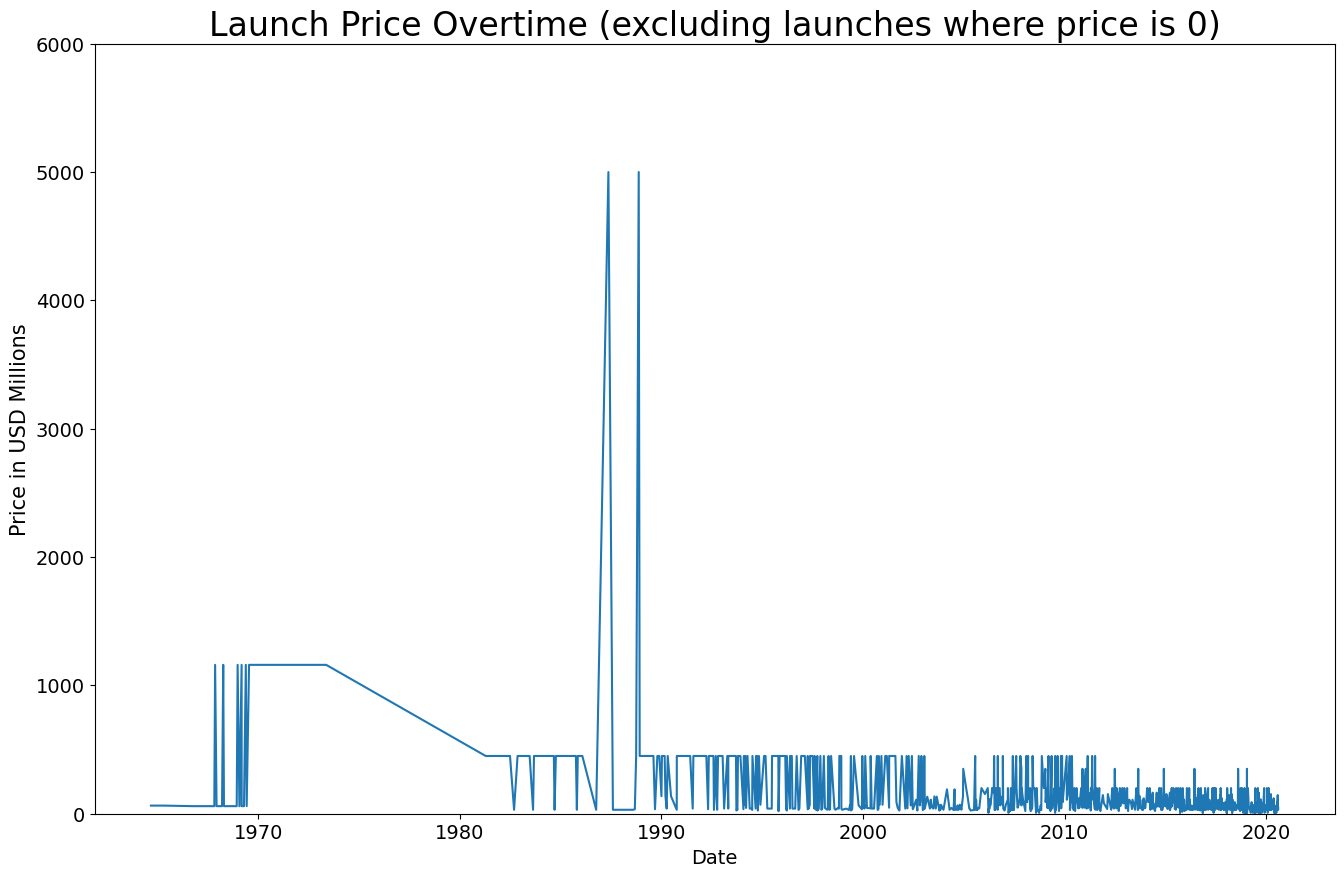

In [ ]:
plt.figure(figsize=(16,10))
plt.title("Launch Price Overtime (excluding launches where price is 0)", fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price in USD Millions", fontsize=15)
plt.ylim(0, 6000)
plt.plot(price_over_time.Date, price_over_time.Price)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
clean_df.head()

,Organisation,Location,Country,ISO,Date,Date_Only,Year_Only,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,USA,2020-08-07 05:12:00,2020-08-07,2020,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,CHN,2020-08-06 04:01:00,2020-08-06,2020,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,USA,2020-08-04 23:57:00,2020-08-04,2020,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,KAZ,2020-07-30 21:25:00,2020-07-30,2020,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,USA,2020-07-30 11:50:00,2020-07-30,2020,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [ ]:
orgs_over_year = clean_df.groupby(["Year_Only","Organisation"], as_index=True).agg({"Organisation": pd.Series.count}).sort_index(ascending=False)
print("Head...\n")
print(orgs_over_year.head(20))
print("Tail...\n")
print(orgs_over_year.tail(20))

Head...

                        Organisation
Year_Only Organisation              
2020      Virgin Orbit             1
          VKS RF                   3
          ULA                      4
          SpaceX                  14
          Roscosmos                4
          Rocket Lab               3
          Northrop                 2
          MHI                      2
          JAXA                     1
          ISA                      1
          IRGC                     1
          IAI                      1
          ExPace                   3
          CASC                    19
          Arianespace              4
2019      i-Space                  1
          VKS RF                   8
          ULA                      5
          SpaceX                  13
          Roscosmos               13
Tail...

                            Organisation
Year_Only Organisation                  
1961      US Air Force                23
          RVSN USSR                    9
    

In [ ]:
# Graph - Revisit

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
# Creating DF that only has the USSR and USA
ussr_countries = ["Russian Federation", "Kazakhstan"]
filter_countries = ["USA", "USSR"]

cold_war_df = clean_df

# Change Russia and Kazakhstan to USSR
cold_war_df.loc[cold_war_df["Country"].isin(ussr_countries), "Country"] = "USSR"

# Filter data to only USA and USSR for dates <= 1991
cold_war_df = cold_war_df.loc[(cold_war_df.Year_Only <= 1991) &
                              (cold_war_df.Country.isin(filter_countries))]

cold_war_df.head()

,Organisation,Location,Country,ISO,Date,Date_Only,Year_Only,Detail,Rocket_Status,Price,Mission_Status
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",USSR,USA,1991-12-20 00:00:00,1991-12-20,1991,Rokot/Briz K | GVM Demo Flight,StatusRetired,0.00,Success
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",USSR,USA,1991-12-18 03:54:00,1991-12-18,1991,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,0.00,Success
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",USA,USA,1991-12-07 22:47:00,1991-12-07,1991,Atlas II | Eutelsat 2F3,StatusRetired,0.00,Success
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",USA,RUS,1991-11-28 13:23:00,1991-11-28,1991,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,0.00,Success
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",USSR,USA,1991-11-27 03:30:00,1991-11-27,1991,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,0.00,Success


In [ ]:
cold_war_df.Country.value_counts()

Country
USSR    1770
USA      662
Name: count, dtype: int64

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
cold_war_counts=cold_war_df.groupby(by="Country").count()
cold_war_counts

,Organisation,Location,ISO,Date,Date_Only,Year_Only,Detail,Rocket_Status,Price,Mission_Status
Country,,,,,,,,,,
USA,662,662,634,662,662,662,662,662,662,662
USSR,1770,1770,1762,1770,1770,1770,1770,1770,1770,1770


In [ ]:
cold_war_pie = px.pie(
    labels=cold_war_counts.index,
    values=cold_war_counts.ISO,
    title="Number of launches by the USA and the USSR during the Cold War",
    names=cold_war_counts.index,
    hole=0.3
)

cold_war_pie.update_traces(textposition="inside", textfont_size=15, textinfo="percent")

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
cold_war_launches_per_year = cold_war_df.groupby(["Year_Only", "Country"], as_index=False).agg({"Mission_Status": pd.Series.count})
cold_war_launches_per_year

,Year_Only,Country,Organisation,Location,ISO,Date,Date_Only,Detail,Rocket_Status,Price,Mission_Status
0,1957,USA,1,1,0,1,1,1,1,1,1
1,1957,USSR,2,2,0,2,2,2,2,2,2
2,1958,USA,23,23,0,23,23,23,23,23,23
3,1958,USSR,5,5,0,5,5,5,5,5,5
4,1959,USA,16,16,12,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...
65,1989,USSR,26,26,26,26,26,26,26,26,26
66,1990,USA,26,26,26,26,26,26,26,26,26
67,1990,USSR,37,37,37,37,37,37,37,37,37
68,1991,USA,18,18,18,18,18,18,18,18,18


In [ ]:
cold_war_launches_per_year_bar = px.bar(x=cold_war_launches_per_year.Year_Only,
                                        y=cold_war_launches_per_year.Mission_Status,
                                        color=cold_war_launches_per_year.Country,
                                        title="Total Number of Launches per Year: USA vs USSR")

cold_war_launches_per_year_bar.update_layout(xaxis_title="Year",
                                             yaxis_title="Launches")

cold_war_launches_per_year_bar.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
cw_failures = cold_war_df.loc[(cold_war_df.Mission_Status == "Failure")]
cw_failures_per_year = cw_failures.groupby(["Year_Only", "Country"], as_index=False).agg({"Mission_Status": pd.Series.count})
cw_failures_per_year.head()

,Year_Only,Country,Mission_Status
0,1957,USA,1
1,1958,USA,16
2,1958,USSR,4
3,1959,USA,8
4,1959,USSR,1


In [ ]:
cw_failures_year_bar = px.bar(x=cw_failures_per_year.Year_Only,
                              y=cw_failures_per_year.Mission_Status,
                              color=cw_failures_per_year.Country,
                              title="Number of Launches per Year: USA vs USSR - Failures Only")

cw_failures_year_bar.update_layout(xaxis_title="Year",
                                             yaxis_title="Failures")

cw_failures_year_bar.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
mission_status = cold_war_df.groupby(by=["Year_Only", "Mission_Status"], as_index=True).agg({"Mission_Status": pd.Series.count})
mission_status

Mission_Status
Year_Only Mission_Status                 
1957      Failure                       1
          Success                       2
1958      Failure                      20
          Partial Failure               2
          Success                       6
...                                   ...
1990      Partial Failure               1
          Success                      60
1991      Failure                       3
          Partial Failure               1
          Success                      43

[95 rows x 1 columns]

In [ ]:
# Insert Graph... - Revisit

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
countries_by_year = clean_df[["Year_Only", "Country"]]
countries_by_year.insert(loc=2, column="Launches", value="Launch")
countries_by_year = countries_by_year.groupby(by=["Year_Only", "Country"], as_index=False).agg({"Launches": pd.Series.count}).sort_values(by=["Year_Only", "Launches"], ascending=False)

In [ ]:
# Lists countries and the total number of launches they had per year... how to return country with highest value per year? - Revisit
countries_by_year

,Year_Only,Country,Launches
345,2020,China,22
351,2020,USA,21
352,2020,USSR,9
349,2020,Japan,3
350,2020,New Zealand,3
...,...,...,...
5,1959,USSR,4
2,1958,USA,23
3,1958,USSR,5
1,1957,USSR,2


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
companies_by_year = clean_df[["Year_Only", "Organisation"]]
companies_by_year.insert(loc=2, column="Launches", value="Launch")
companies_by_year = companies_by_year.groupby(by=["Year_Only", "Organisation"], as_index=False).agg({"Launches": pd.Series.count}).sort_values(by=["Year_Only", "Launches"], ascending=False)

In [ ]:
# Lists orgs and the total number of launches they had per year... how to return org with highest value per year? - Revisit
companies_by_year

,Year_Only,Organisation,Launches
634,2020,CASC,19
644,2020,SpaceX,14
633,2020,Arianespace,4
643,2020,Roscosmos,4
645,2020,ULA,4
...,...,...,...
4,1958,RVSN USSR,5
3,1958,NASA,2
5,1958,US Air Force,2
0,1957,RVSN USSR,2
